# Apple Stock Market: Closing Price Prediction

<img src="apple-store.jpg" alt="Apple Store Hamburg" width="600">

## Importing the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

The [dataset](https://www.kaggle.com/datasets/varpit94/apple-stock-data-updated-till-22jun2021) contains daily historical stock market data for Apple Inc. (AAPL) spanning from December 1980 to March 2022. It includes information such as opening and closing prices, high and low prices, and trading volume.

**Features**
- **Date**: The date of the trading day.
- **Open**: The opening price of Apple's stock on that trading day.
- **High**: The highest price of Apple's stock on that trading day.
- **Low**: The lowest price of Apple's stock during that trading day.
- **Close**: The closing price of Apple's stock on that trading day.
- **Adj Close**: Closing price adjusted to reflect the value after accounting for any corporate actions.
- **Volume**: Number of units traded in a day.

In [2]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700
10408,2022-03-24,171.059998,174.139999,170.210007,174.070007,174.070007,90018700


## About the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB


In [5]:
df.shape

(10409, 7)

In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
# Checking for NULL values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# Checking for duplicate rows
df.duplicated().sum()

0

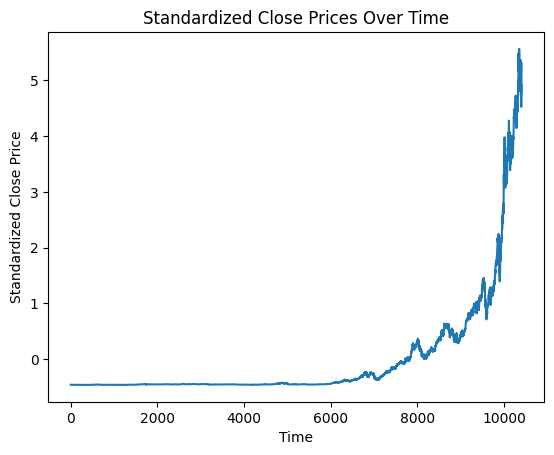

In [9]:
# Calculate standardized values for 'Close' prices
standardized_price = (df['Close'] - np.mean(df['Close'])) / np.std(df['Close'])

# Plot the standardized prices
plt.plot(standardized_price)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Standardized Close Price')
plt.title('Standardized Close Prices Over Time')

# Display the plot
plt.show()


## Feature Engineering

In [10]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [11]:
# Spliting the Date column into Year, Month, and Day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.dtypes[['Year', 'Month', 'Day']]

Year     int32
Month    int32
Day      int32
dtype: object

In [12]:
# Dropping the Date column
df.drop(columns=['Date'], inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,0.128348,0.128906,0.128348,0.128348,0.100323,469033600,1980,12,12
1,0.122210,0.122210,0.121652,0.121652,0.095089,175884800,1980,12,15
2,0.113281,0.113281,0.112723,0.112723,0.088110,105728000,1980,12,16
3,0.115513,0.116071,0.115513,0.115513,0.090291,86441600,1980,12,17
4,0.118862,0.119420,0.118862,0.118862,0.092908,73449600,1980,12,18


In [13]:
# Show the statistics of numerical columns
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
count,10409.000000,10409.000000,10409.000000,10409.000000,10409.000000,1.040900e+04,10409.000000,10409.000000,10409.000000
mean,13.959910,14.111936,13.809163,13.966757,13.350337,3.321778e+08,2001.067922,6.519935,15.736670
std,30.169244,30.514878,29.835055,30.191696,29.911132,3.393344e+08,11.922038,3.442178,8.743984
min,0.049665,0.049665,0.049107,0.049107,0.038384,0.000000e+00,1980.000000,1.000000,1.000000
25%,0.281964,0.287946,0.274554,0.281250,0.234799,1.247604e+08,1991.000000,4.000000,8.000000
50%,0.468750,0.477679,0.459821,0.468750,0.386853,2.199680e+08,2001.000000,7.000000,16.000000
75%,14.217857,14.364286,14.043571,14.206071,12.188149,4.126108e+08,2011.000000,10.000000,23.000000
max,182.630005,182.940002,179.119995,182.009995,181.778397,7.421641e+09,2022.000000,12.000000,31.000000


In [14]:
# Showing the correlation between the columns
df.corr()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Open,1.000000,0.999945,0.999928,0.999861,0.999494,-0.189987,0.643184,0.008149,-0.003125
High,0.999945,1.000000,0.999910,0.999931,0.999589,-0.189387,0.642811,0.007958,-0.003066
Low,0.999928,0.999910,1.000000,0.999929,0.999547,-0.190955,0.643496,0.008339,-0.002993
Close,0.999861,0.999931,0.999929,1.000000,0.999641,-0.190182,0.643105,0.008159,-0.003061
Adj Close,0.999494,0.999589,0.999547,0.999641,1.000000,-0.193284,0.628721,0.007882,-0.003089
Volume,-0.189987,-0.189387,-0.190955,-0.190182,-0.193284,1.000000,0.176063,-0.054023,-0.011125
Year,0.643184,0.642811,0.643496,0.643105,0.628721,0.176063,1.000000,-0.014138,-0.003237
Month,0.008149,0.007958,0.008339,0.008159,0.007882,-0.054023,-0.014138,1.000000,0.001402
Day,-0.003125,-0.003066,-0.002993,-0.003061,-0.003089,-0.011125,-0.003237,0.001402,1.000000


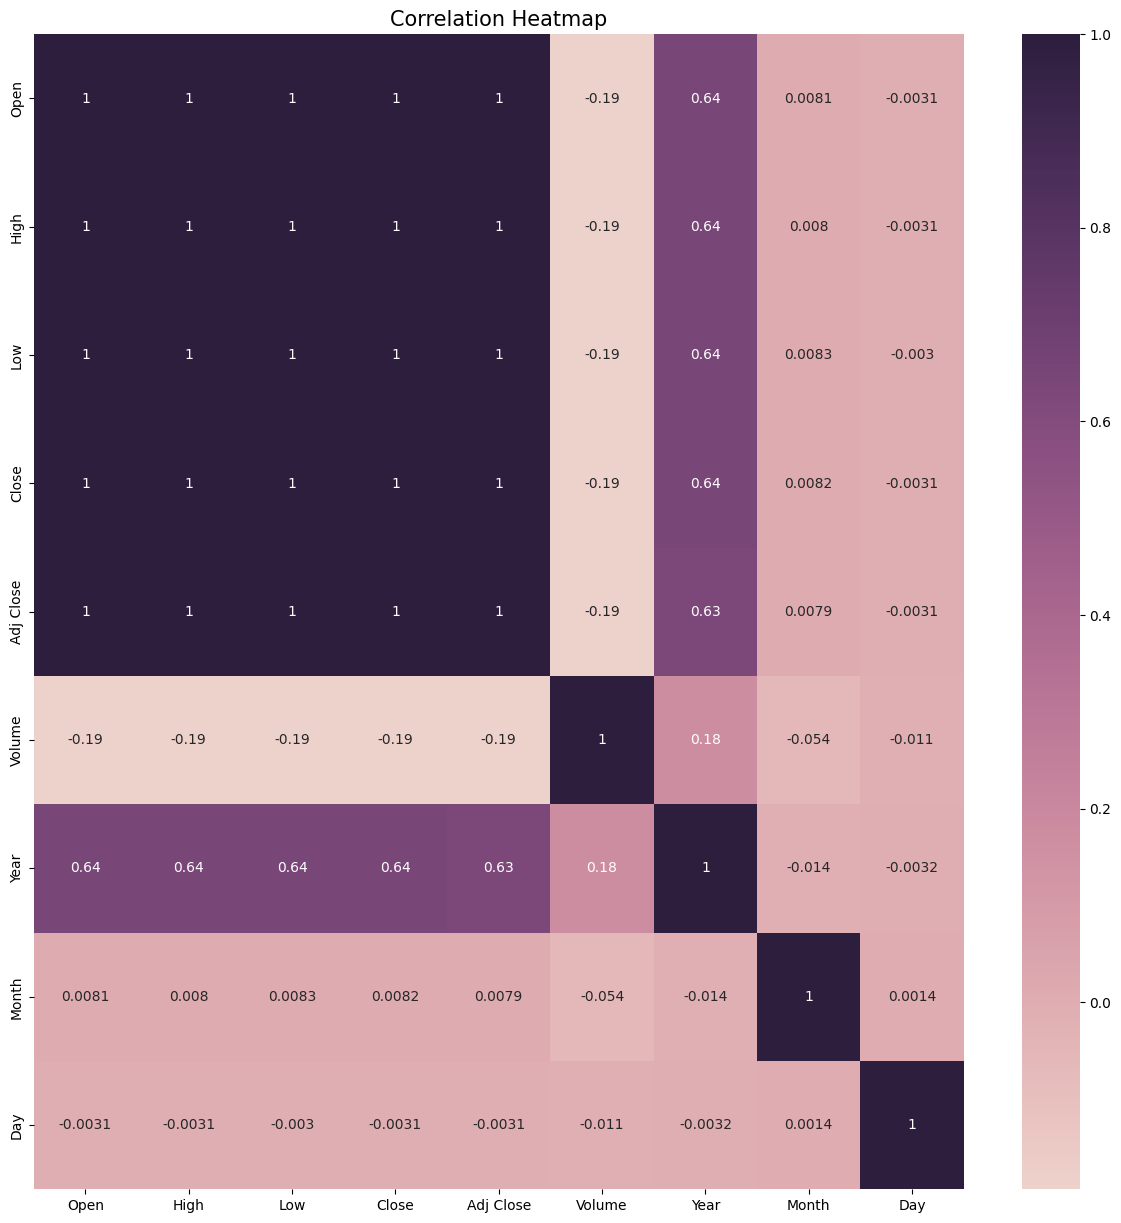

In [15]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

In [16]:
# Sorting features by correlation with the closing price
df.corr()['Close'].sort_values(ascending = False)

Close        1.000000
High         0.999931
Low          0.999929
Open         0.999861
Adj Close    0.999641
Year         0.643105
Month        0.008159
Day         -0.003061
Volume      -0.190182
Name: Close, dtype: float64

According to the correlation coefficients above, changes in the `High`, `Low`, `Open` prices tend to correlate closely with the `Close` price. Additionally, there's a moderate negative correlation with trading volume.

## Determining Normality

Making our target variable normally distributed often will lead to better results.

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:

* Using a Visual approach
* Using a Statistical Test

**Visual Approach**

<Axes: >

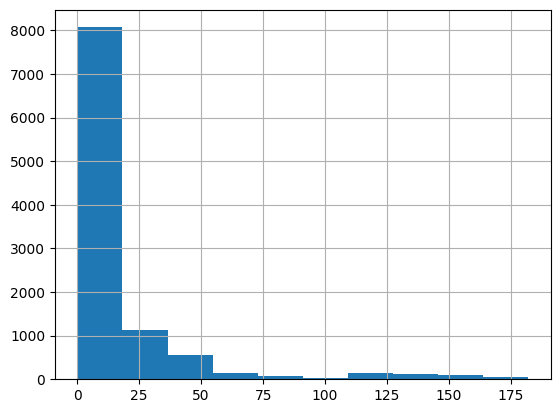

In [17]:
# Plotting the closing price
df.Close.hist()

**Statistical Test**

Tests whether the `Close` price distribution is normally distributed or not.
- This test outputs a **p-value**. The _higher_ this p-value is the _closer_ the distribution is to normal.
- Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [18]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(df.Close.values)

NormaltestResult(statistic=6948.551396567438, pvalue=0.0)

A p-value of 0.0 indicates that the observed data is extremely unlikely under the assumption that the null hypothesis is true. Which means it is likely that the `Close` price distribution is _not_ normally distributed.

## Applying transformations

We're using the following transformation methods to make the target variable, `Close` price, more normally distributed for Regression.
* Log Transformation
* Square root Transformation
* Box cox Transformation

### Log Transformation

The log transformation can transform data that is significantly skewed right to be more normally distributed.

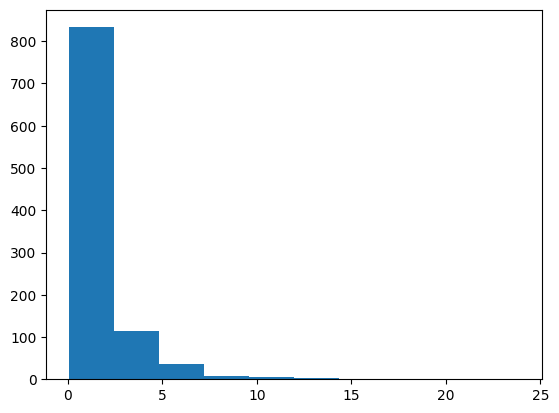

In [19]:
df_exp = np.exp(np.random.normal(size=1000))
plt.hist(df_exp)
plt.show()

(array([  5.,  37.,  83., 192., 251., 220., 130.,  66.,  14.,   2.]),
 array([-2.94194816, -2.33038792, -1.71882768, -1.10726744, -0.4957072 ,
         0.11585305,  0.72741329,  1.33897353,  1.95053377,  2.56209401,
         3.17365425]),
 <BarContainer object of 10 artists>)

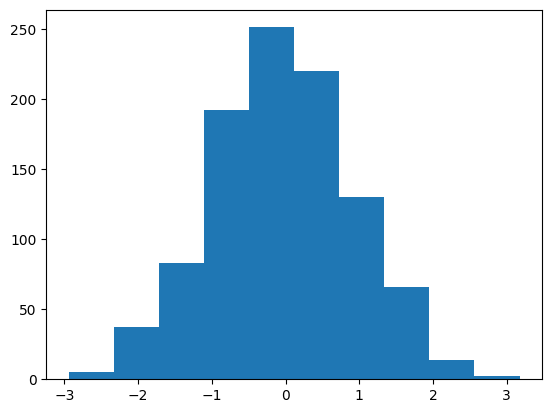

In [20]:
constant = 1e-10  # small positive constant
plt.hist(np.log(df_exp + constant))

<Axes: >

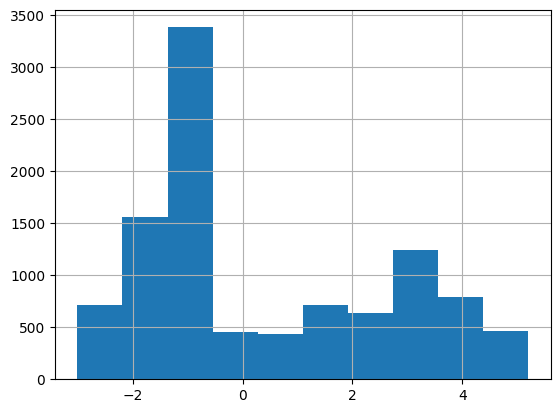

In [21]:
df_log = np.log(df.Close + constant)
df_log.hist()

In [22]:
normaltest(df_log)

NormaltestResult(statistic=5356.237441732255, pvalue=0.0)

### Square Root Transformation

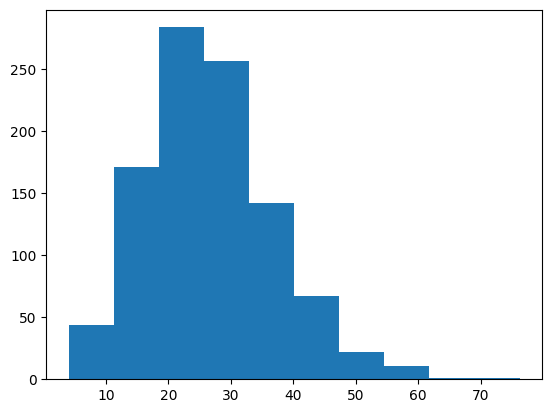

In [23]:
df_square = np.square(np.random.normal(loc=5, size=1000))
plt.hist(df_square)
plt.show()

(array([  7.,  37.,  99., 229., 249., 214., 115.,  37.,  11.,   2.]),
 array([2.01278841, 2.68452525, 3.3562621 , 4.02799894, 4.69973578,
        5.37147263, 6.04320947, 6.71494632, 7.38668316, 8.05842001,
        8.73015685]),
 <BarContainer object of 10 artists>)

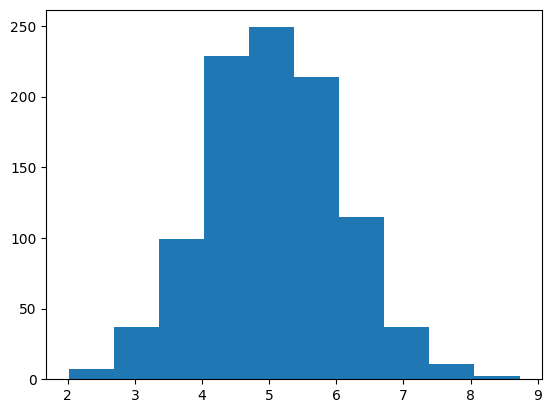

In [24]:
plt.hist(np.sqrt(df_square))

In [25]:
normaltest(df_square)

NormaltestResult(statistic=76.2099768955898, pvalue=2.8262708818078395e-17)

### Box cox Transformation

The box cox transformation is a parametrized transformation that tries to get distributions _as close to a normal distribution as possible_.

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

It is a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.


In [26]:
from scipy.stats import boxcox
bc_result = boxcox(df.Close)
boxcox_medv = bc_result[0]
lam = bc_result[1]
lam

-0.17953935348261718

(array([ 200.,  768.,  903., 2379., 1539.,  422.,  559.,  748., 1663.,
        1228.]),
 array([-3.99842057, -3.26040612, -2.52239167, -1.78437722, -1.04636277,
        -0.30834832,  0.42966613,  1.16768058,  1.90569503,  2.64370948,
         3.38172393]),
 <BarContainer object of 10 artists>)

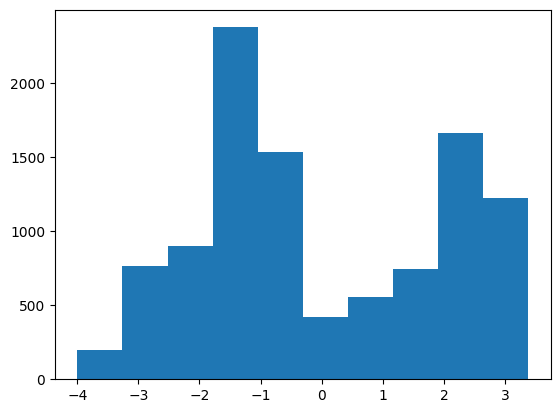

In [27]:
plt.hist(boxcox_medv)

In [28]:
boxcox_test_res = normaltest(boxcox_medv)
boxcox_test_res

NormaltestResult(statistic=48083.19110536252, pvalue=0.0)

In [29]:
d = {'Transormation': ['Log', 'Square Root', 'Box Cox'], 'P-value': [normaltest(df_log)[1], normaltest(df_square)[1], normaltest(boxcox_medv)[1]]}
df_results = pd.DataFrame(data=d)
df_results

,Transormation,P-value
0,Log,0.000000e+00
1,Square Root,2.826271e-17
2,Box Cox,0.000000e+00


Since Log Transformation is the only method that gives a p-value greater than 0.05, we will be using it to transform the `Close` price.

### Testing Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

In [31]:
lr = LinearRegression()

In [32]:
# Create X and y
y_col = "Close"
X = df.drop(y_col, axis=1)
y = df[y_col]

In [33]:
X.shape

(10409, 8)

Create Polynomial Features

In [34]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [35]:
X_pf.shape

(10409, 44)

Train test split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state=72018)

Fit `StandardScaler` on `X_train` as before

In [37]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

Apply the appropriate transformation

In [38]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

As before, we'll now:
1. Fit regression
2. Transform testing data
3. Predict on testing data

In [39]:
y_train_bc.shape

(7286,)

In [40]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

### Inverse Transform

Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$,

In [41]:
from scipy.special import inv_boxcox
boxcox_medv[:10]

array([-2.4824838 , -2.56031956, -2.67235728, -2.63625622, -2.5942567 ,
       -2.50788606, -2.4392595 , -2.38004498, -2.30717415, -2.18329122])

In [42]:
inv_boxcox(boxcox_medv, lam)[:10]

array([0.128348, 0.121652, 0.112723, 0.115513, 0.118862, 0.126116,
       0.132254, 0.137835, 0.145089, 0.158482])

In [43]:
df['Close'].values[:10]

array([0.128348, 0.121652, 0.112723, 0.115513, 0.118862, 0.126116,
       0.132254, 0.137835, 0.145089, 0.158482])

As shown above, we have successfully use the inverse transformation to get back to the original scale.

In [44]:
# Apply the appropriate inverse transformation to y_pred_bc
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_test,y_pred_tran)

-86.58066282061395

In [45]:
y_test

8984    26.084999
9608    38.325001
669      0.151228
7258     6.607857
3964     0.200893
          ...    
1056     0.123326
1263     0.088170
2065     0.330357
4973     0.866071
3971     0.221959
Name: Close, Length: 3123, dtype: float64

In [46]:
y_pred_bc

array([ 2.09261119,  2.20461358, -2.3832805 , ..., -1.65892324,
       -0.62560673, -1.31716827])

In [47]:
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_pred_tran,y_test)

0.051605604620551415

## Regression Models

Applying various linear regression models with advanced methods through the following steps:

- Chain multiple data processing steps together using `Pipeline`.
- Use the `KFolds` object to split data into multiple folds.
- Perform cross validation using SciKit Learn with `cross_val_predict` and `GridSearchCV`.

In [48]:
# Import libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV

In [49]:
# Reread the data
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [50]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [51]:
x = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df['Close']
kf = KFold(shuffle=True, random_state=42, n_splits=3)

### 1 — Linear Regression

In [52]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("linear_regression", LinearRegression())])

params = {
    "polynomial_features__degree": range(3),
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

(0.9999950142746123, {'polynomial_features__degree': 2})

In [53]:
best_vanilla_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("linear_regression", LinearRegression())])

best_vanilla_estimator.fit(X, y)
best_vanilla_estimator.score(X, y)

0.9999957368540688

In [54]:
linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))
linearRegression_R2 = r2_score(y_test, linearRegression.predict(X_test)) 
print(linearRegression_rmse)
print(linearRegression_R2)

0.21188732061589946
0.9999532340143444


[Text(0.5, 0, 'Closing Price'),
 Text(0, 0.5, 'Predicted Closing Price'),
 (0.0, 182.009995),
 (0.0, 182.009995),
 Text(0.5, 1.0, 'Vanilla Model Results')]

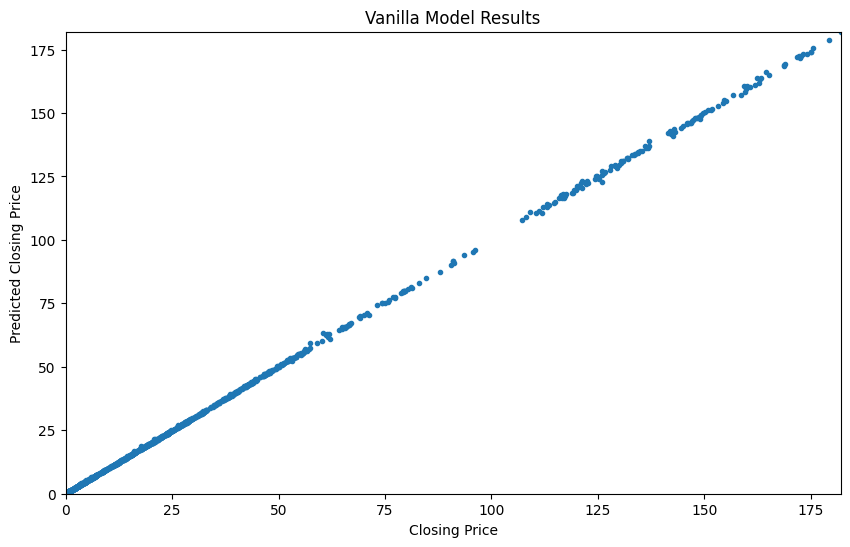

In [55]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Closing Price', 
       ylabel='Predicted Closing Price', 
       xlim=lim,
       ylim=lim,
       title='Vanilla Model Results')

### 2 — Lasso Regression

In [56]:
best_lasso_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.85))])

best_lasso_estimator.fit(X, y)
best_lasso_estimator.score(X, y)

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.491e+02, tolerance: 9.487e+02
  model = cd_fast.enet_coordinate_descent(


0.9972541185599195

In [57]:
from sklearn.linear_model import LassoCV
alphas = np.geomspace(0.1, 400, 1000)
lassoCV = LassoCV(alphas=alphas,
                  max_iter=10000,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))
lassoCV_R2 = r2_score(y_test, lassoCV.predict(X_test)) 

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower
print(lassoCV_R2)

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1125.4897493044407, tolerance: 433.76514427078445
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1099.2648132713548, tolerance: 433.76514427078445
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1078.413193594076, tolerance: 433.76514427078445
  model = cd_fast.enet_coordinate_descent_gram(
c:

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 688.1850761112787, tolerance: 435.7332889738736
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 683.6081180757576, tolerance: 435.7332889738736
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 679.0689658153515, tolerance: 435.7332889738736
  model = cd_fast.enet_coordinate_descent_gram(
c:\User

0.1 0.17063508079381798
0.9999696710902652


[Text(0.5, 0, 'Closing Price'),
 Text(0, 0.5, 'Predicted Closing Price'),
 (0.0, 182.009995),
 (0.0, 182.009995),
 Text(0.5, 1.0, 'Lasso Model Results')]

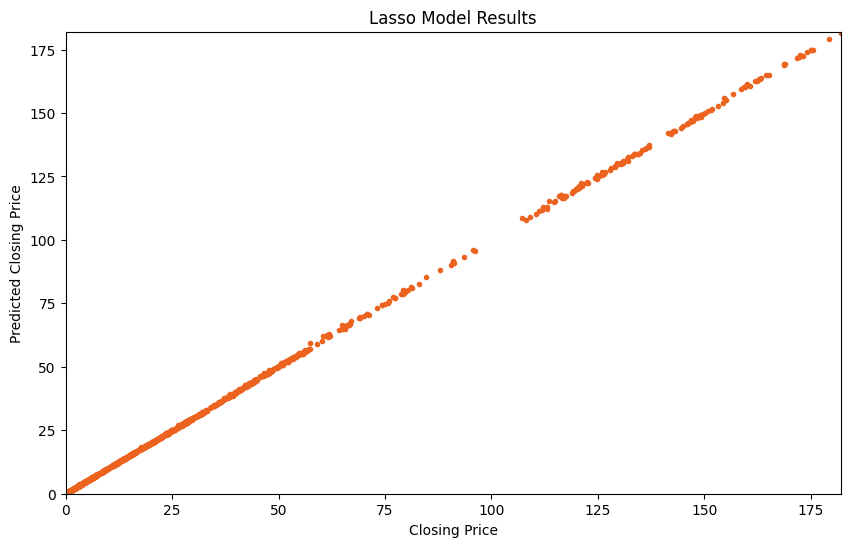

In [58]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, lassoCV.predict(X_test), 
         marker='o', ls='', color='#eb631e', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Closing Price', 
       ylabel='Predicted Closing Price',  
       xlim=lim,
       ylim=lim,
       title='Lasso Model Results')

### 3 — Ridge Regression

In [59]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    "polynomial_features__degree": [1, 2, 3],
    "ridge_regression__alpha": np.geomspace(2, 30, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

(0.9999896443727215,
 {'polynomial_features__degree': 3, 'ridge_regression__alpha': 2.0})

In [60]:
best_ridge_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=19.56))])

best_ridge_estimator.fit(X, y)
best_ridge_estimator.score(X, y)

0.7713375703525633

In [61]:
pf = PolynomialFeatures(degree=2)
s = StandardScaler()
X_pf = pf.fit_transform(X)
X_s = s.fit_transform(X_pf)
X_train, X_test, y_train, y_test = train_test_split(X_s, y, shuffle=True, test_size=0.3, random_state=42)

In [62]:
alphas = np.geomspace(0.01, 20, 1000).tolist()
ridgeCV = RidgeCV(alphas=alphas, cv=3).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))
ridgeCV_R2 = r2_score(y_test, ridgeCV.predict(X_test)) 

print(ridgeCV.alpha_, ridgeCV_rmse)
print(ridgeCV_R2)

0.01 0.11505341146048681
0.9999848727397825


[Text(0.5, 0, 'Closing Price'),
 Text(0, 0.5, 'Predicted Closing Price'),
 (0.0, 180.330002),
 (0.0, 180.330002),
 Text(0.5, 1.0, 'Ridge Model Results')]

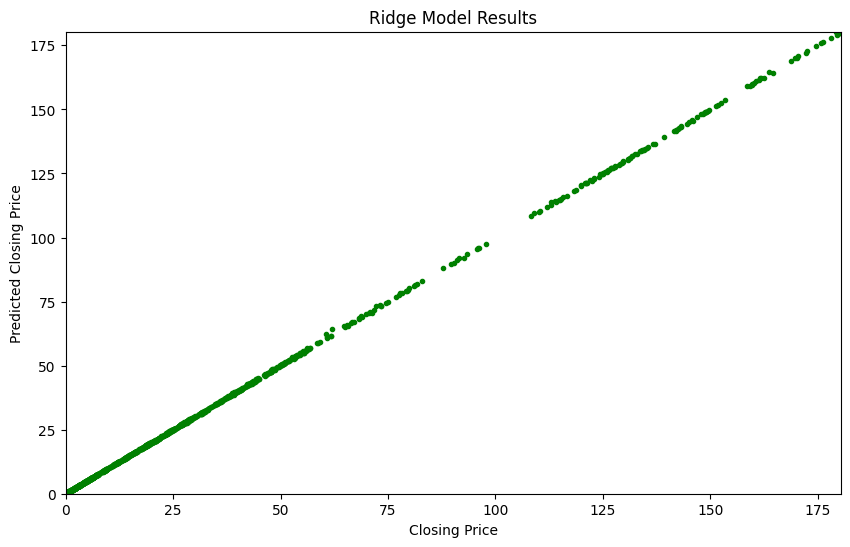

In [63]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, ridgeCV.predict(X_test), 
         marker='o', ls='', color='g', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Closing Price', 
       ylabel='Predicted Closing Price', 
       xlim=lim,
       ylim=lim,
       title='Ridge Model Results')

### 4 — Elastic Net Regression

In [64]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the range of alpha values and l1 ratios
alphas = np.geomspace(0.001, 1, 100)
l1_ratios = np.linspace(0.1, 0.9, 10)

# Initialize and fit ElasticNetCV model
elasticNetCV = ElasticNetCV(alphas=alphas, 
                            l1_ratio=l1_ratios,
                            max_iter=10000).fit(X_train, y_train)

# Calculate predictions and evaluation metrics
elasticNetCV_rmse = mean_squared_error(y_test, elasticNetCV.predict(X_test), squared=False)
elasticNetCV_R2 = r2_score(y_test, elasticNetCV.predict(X_test)) 

# Print results
print("Optimal alpha:", elasticNetCV.alpha_)
print("Optimal l1_ratio:", elasticNetCV.l1_ratio_)
print("Root Mean Squared Error:", elasticNetCV_rmse)
print("R^2 Score:", elasticNetCV_R2)

Optimal alpha: 0.001
Optimal l1_ratio: 0.9
Root Mean Squared Error: 0.16934236180348738
R^2 Score: 0.9999672287881328


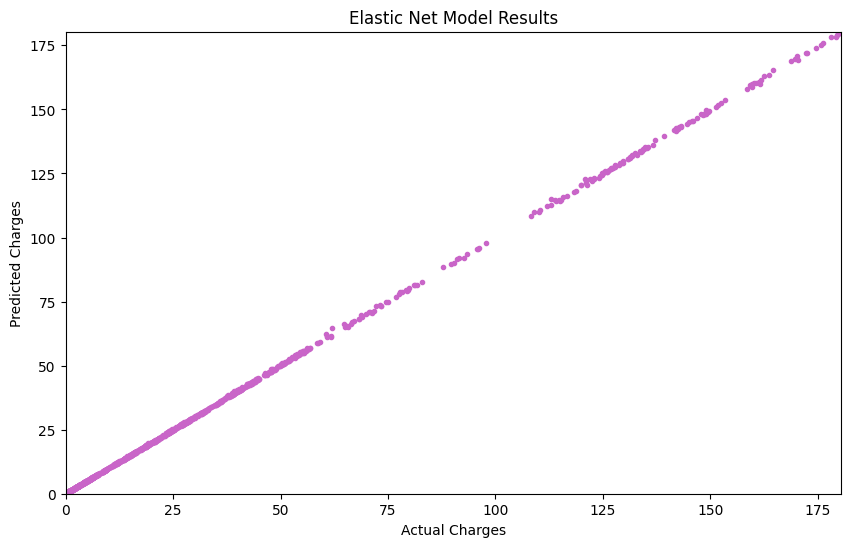

In [65]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, elasticNetCV.predict(X_test), 
         marker='o', ls='', color='#c965c8', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Charges', 
       ylabel='Predicted Charges', 
       xlim=lim,
       ylim=lim,
       title='Elastic Net Model Results');

In [66]:
rmse_vals = [linearRegression_rmse, lassoCV_rmse, ridgeCV_rmse, elasticNetCV_rmse]
R2_vals = [linearRegression_R2, lassoCV_R2, ridgeCV_R2, elasticNetCV_R2] 

labels = ['Linear', 'Lasso', 'Ridge', 'ElasticNet']
metric_df = pd.Series(rmse_vals, index=labels).to_frame()
metric_df.rename(columns={0: 'RMSE'}, inplace=1)
metric_df['R2'] = R2_vals
metric_df

,RMSE,R2
Linear,0.211887,0.999953
Lasso,0.170635,0.999970
Ridge,0.115053,0.999985
ElasticNet,0.169342,0.999967
